# Анализ данных сервиса аренды самокатов GoFast

У нас есть данные о некоторых пользователях сервиса аренды самокатов `GoFast` из нескольких городов, а также об их поездках.  
Известно:  
Чтобы совершать поездки по городу, пользователи сервиса `GoFast` пользуются мобильным приложением. 
Сервисом можно пользоваться:
- без подписки 
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — `8 рублей`;
    - стоимость старта (начала поездки) — `50 рублей`;
- с подпиской Ultra 
    - абонентская плата — `199 рублей` в месяц;
    - стоимость одной минуты поездки — `6 рублей`;
    - стоимость старта — `бесплатно`.
    
Исходные данные находятся в файлах:
- /datasets/users_go.csv (данные о пользователях)
- /datasets/rides_go.csv (данные о поездках)
- /datasets/subscriptions_go.csv (данные о подписках)

Необходимо выполнить предобработку.

Необходимо исследовать:
- частоту встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

Необходимо проверить гипотезы:
- тратят ли пользователи с подпиской больше времени на поездки;
- можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает `3130` метров;
- будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;

Выяснить какой тест понадобился бы для проверки гипотезы о снижении обращаемости после проведения обновления сервиса.

С помощью распределений выяснить:
- рассчитать сколько отправить промокодов для увеличения платных подписок на `100` с вероятностью совершения ошибки менее `5%`;
- рассчитать вероятность прочтения уведомления менее чем `399500` клиентами.

# Оглавление
  Анализ данных сервиса аренды самокатов GoFast  
   1 Открываем файл с данными и изучаем общую информацию  
    1.1 Импортируем библиотеки необходимые для работы с табличными данными и построения графиков  
    1.2 Читаем файлы и смотрим на данные  
     1.2.1 Читаем файл `users_go.csv` и смотрим на данные  
     1.2.2 Читаем файл `rides_go.csv` и смотрим на данные  
     1.2.3 Читаем файл `subscriptions_go.csv` и смотрим на данные  
   2 Предобработка данных  
    2.1 Исправление дубликатов  
     2.1.1 Явные дубликаты в `users_go` 
     2.1.2 Явные дубликаты  в `rides_go`  
    2.2 Исправление некорректных типов данных в столбцах  
     2.2.1 Столбец `date` в `rides_go`  
    2.3 Исправление некорректных значений  
     2.3.1 Столбец `duration`  
    2.4 Добавление новых столбцов  
     2.4.1 Добавление столбца `month`  
   3 Исследовательский анализ данных  
    3.1 Частота встречаемости городов  
    3.2 Пользователи с подпиской и без подписки  
    3.3 Возраст пользователей  
    3.4 Расстояние поездки  
    3.5 Продолжительность поездки  
   4 Подготовка данных для дальнейшего анализа  
    4.1 Объединение данных  
    4.2 Разделение данных по типу  подписки  
    4.3 Сравнение длительности и дальности поездок с подпиской и без подписки  
     4.3.1 Расстояние поездок  
     4.3.2 Продолжительность поездок  
     4.3.3 Зависимость расстояния поездки от дительности  
   5 Подсчёт выручки  
   6 Проверка гипотез  
    6.1 Тратят ли пользователи с подпиской больше времени на поездки  
    6.2 Превышает ли расстояние поездки с подпиской 3130 м
    6.3 Выручка у пользователей с подпиской превышает выручку пользователей без подписки  
    6.4 Выбор гипотезы для проверки после изменений  
   7 Распределения  
    7.1 Увеличение количества платных подписок  
    7.2 Поиск вероятности прочтения уведомления  
   8 Вывод

## 1 Открываем файл с данными и изучаем общую информацию

### 1.1 Импортируем библиотеки необходимые для работы с табличными данными и построения графиков

In [1]:
import pandas as pd
import numpy as np

#Для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

#Для проверки гипотез
from scipy import stats as st

#Для распределений
from math import sqrt
from scipy.stats import binom, norm
from scipy import stats as st

### 1.2 Читаем файлы и смотрим на данные

#### 1.2.1 Читаем файл `users_go.csv` и смотрим на данные

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')

Смотрим на первые 5 строк

In [3]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Смотрим общую информаю используя метод info()

In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
for col in users_go.columns:
  print('Название колонки:', col)
  print('Кол-во уникальных значений:', len(users_go[col].unique()))
  print(users_go[col].unique())
  print('-------------------------------------------------------')

Название колонки: user_id
Кол-во уникальных значений: 1534
[   1    2    3 ... 1532 1533 1534]
-------------------------------------------------------
Название колонки: name
Кол-во уникальных значений: 194
['Кира' 'Станислав' 'Алексей' 'Константин' 'Адель' 'Регина' 'Игорь' 'Юрий'
 'Ян' 'Валерий' 'Агата' 'Марк' 'Ева' 'Антонина' 'Валерия' 'Амалия'
 'Даниил' 'Аделина' 'Святогор' 'Борис' 'Вероника' 'Ростислав' 'Назар'
 'Эдуард' 'Василий' 'Денис' 'Тамара' 'Николай' 'Эвелина' 'Федор' 'Руслан'
 'Иван' 'Любовь' 'Ярослава' 'Майя' 'Ильдар' 'Данила' 'Нина' 'Стефания'
 'Ясмина' 'Дмитрий' 'Александр' 'Одиссей' 'Арсений' 'Алла' 'Таисия'
 'Максим' 'Юлиана' 'Павел' 'Карина' 'Алиса' 'Лидия' 'Рамиль' 'Родион'
 'Ника' 'Оксана' 'Анастасия' 'Маргарита' 'Вера' 'Тимур' 'Никита' 'Лев'
 'Влад' 'Артур' 'Анна' 'Ольга' 'Вячеслав' 'Ксения' 'Виталина' 'Владислав'
 'Тамерлан' 'Амина' 'Вадим' 'Олеся' 'Зарина' 'Егор' 'Гордей' 'Лилия'
 'Святослав' 'Роберт' 'Амир' 'Влада' 'Богдан' 'Полина' 'Марат' 'Елисей'
 'Макар' 'Али

В таблице `users_go` мы видим, что:  
- в данных нет пропусков;
- все типы данных корректные;
- неявные дубликаты отсутствуют;
- в колонке `user_id` есть `31` дубликат уникальных `user_id` пользователей;
- все значения корректные.

#### 1.2.2 Читаем файл `rides_go.csv` и смотрим на данные

In [6]:
rides_go = pd.read_csv('/datasets/rides_go.csv')

Смотрим на первые 5 строк

In [7]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


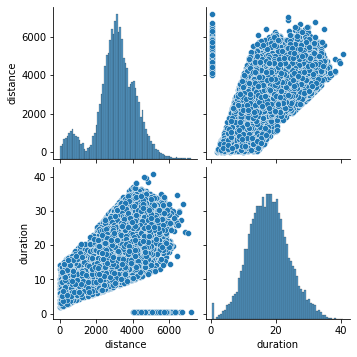

In [8]:
sns.pairplot(data=rides_go[['distance','duration']]);

Смотрим общую информаю используя метод info()

In [9]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Смотрим на количество уникальных пользователей

In [10]:
rides_go['user_id'].unique()

array([   1,    2,    3, ..., 1532, 1533, 1534])

В таблице с поездками есть поездки всех пользователей

В таблице `rides_go` мы видим, что:  
- в данных нет пропусков;
- неявных дубликатов здесь нет;
- все типы данных корректные, кроме колонки `date`;
- все пользователи совершили хотя бы одну поездку.

#### 1.2.3 Читаем файл `subscriptions_go.csv` и смотрим на данные

In [11]:
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

Смотрим на первые 5 строк

In [12]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Смотрим общую информаю используя метод info()

In [13]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице `subscriptions_go` мы видим, что:  
- в данных нет пропусков;
- все типы данных корректные;
- неявные дубликаты отсутствуют;
- все значения корректные.

## 2 Предобработка данных

### 2.1 Исправление дубликатов

#### 2.1.1 Явные дубликаты в `users_go`

Считаем количество явных дубликатов

In [14]:
len(users_go[users_go.duplicated()].sort_values(by='user_id'))

31

Смотрим на явные дубликаты

In [15]:
users_go[users_go.duplicated()].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
1535,16,Амалия,27,Краснодар,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
1549,108,Влада,29,Тюмень,ultra
1553,121,Алина,25,Пятигорск,ultra
1540,127,Павел,25,Пятигорск,ultra
1548,136,Марсель,25,Тюмень,ultra
1543,153,Герман,23,Москва,ultra
1542,204,Руслан,30,Пятигорск,ultra


Удяляем явные дубликаты

In [16]:
users_go.drop_duplicates(inplace=True)

Проверяем что все дубликаты были удалены корректно

In [17]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [18]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


#### 2.1.2 Явные дубликаты  в `rides_go`

In [19]:
rides_go[rides_go.duplicated()]

,user_id,distance,duration,date


Явных дубликатов нет

Итак, все явные дубликаты устранены, а на неявные дубликаты мы проверили при просмотре данных в разделе 1)

### 2.2 Исправление некорректных типов данных в столбцах

В данных был найден только один столбец с некорректными данными и это столбец с датой поездки `date` в `rides_go`

#### 2.2.1 Столбец `date` в `rides_go`

In [20]:
rides_go['date'] = pd.to_datetime(rides_go['date'])

Смотрим на корректность изменения

In [21]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### 2.3 Исправление некорректных значений

#### 2.3.1 Столбец `duration`

Мы видели значения в колонке `duration` близкие к `0`. Посмотрим на значения меньше `1`

In [22]:
rides_go[rides_go['duration']<1]

,user_id,distance,duration,date
6531,701,4196.445201,0.5,2021-08-31
6570,704,4830.824371,0.5,2021-10-14
6680,712,4684.004397,0.5,2021-03-04
6695,713,5215.642710,0.5,2021-02-25
6768,718,5197.436649,0.5,2021-02-11
...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19
17242,1477,6724.932981,0.5,2021-01-12
17314,1483,4445.481070,0.5,2021-03-06
17505,1496,5722.551787,0.5,2021-02-14


In [23]:
rides_go[rides_go['duration']<1]['duration'].value_counts()

0.5    95
Name: duration, dtype: int64

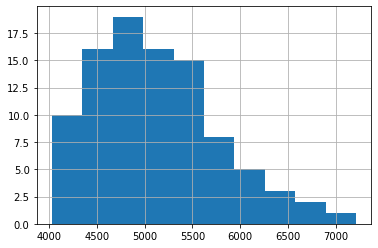

In [24]:
rides_go[rides_go['duration']<1]['distance'].hist();

Считаем долю значений `0.5` от общего количества

In [25]:
len(rides_go[rides_go['duration']<1]['duration'])/len(rides_go['duration'])

0.005257914545052026

Итак, мы видим что есть 95 значений длительности со значением равным `0.5` и пройденным расстоянием от `4000` до `8000` метров. Значения `0.5` некорректные и они составляют около 0.5% от всех значений. Мы их можем удалить.

In [26]:
rides_go.drop(rides_go[rides_go['duration']<1].index, inplace=True)

Проверяем корректность удаления

In [27]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 702.1 KB


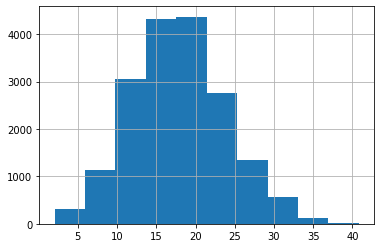

In [28]:
rides_go['duration'].hist();

Некорректные значения удалены. Данные не испортились.

### 2.4 Добавление новых столбцов

#### 2.4.1 Добавление столбца `month`

Прежде чем выделять номер месяца посмотрим за какие года мы имеем данные

In [29]:
rides_go['year'] = rides_go['date'].dt.year
rides_go['year'].unique()

array([2021])

Мы имеем даные только за 2021 год. Теперь можем добавлять колонку с месяцем.

In [30]:
rides_go['month'] = rides_go['date'].dt.month

In [31]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   year      17973 non-null  int64         
 5   month     17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 982.9 KB


In [32]:
rides_go['month'].value_counts()

1     1576
5     1552
6     1548
3     1533
7     1522
12    1516
9     1511
8     1510
4     1499
10    1471
11    1407
2     1328
Name: month, dtype: int64

Итак, дубликаты устранены, типы данных скорректированы и добавлены столбцы необходимые для исследовательского анализа

## 3 Исследовательский анализ данных

### 3.1 Частота встречаемости городов

Строим сводную таблицу по распределению пользователей по городам регистрации

In [33]:
city_reg_cnt = users_go \
            .pivot_table(index='city', values=['user_id'], aggfunc='count') \
            .reset_index() \
            .sort_values(by='user_id', ascending=False)
city_reg_cnt.columns = ['Город_пользователя', 'Количество_пользователей']
city_reg_cnt['Доля_городов'] = city_reg_cnt['Количество_пользователей']/city_reg_cnt['Количество_пользователей'].sum()
city_reg_cnt.round(2)

,Город_пользователя,Количество_пользователей,Доля_городов
4,Пятигорск,219,0.14
0,Екатеринбург,204,0.13
5,Ростов-на-Дону,198,0.13
1,Краснодар,193,0.13
6,Сочи,189,0.12
3,Омск,183,0.12
7,Тюмень,180,0.12
2,Москва,168,0.11


Строим гистограмму по распределению пользователей по городам регистрации

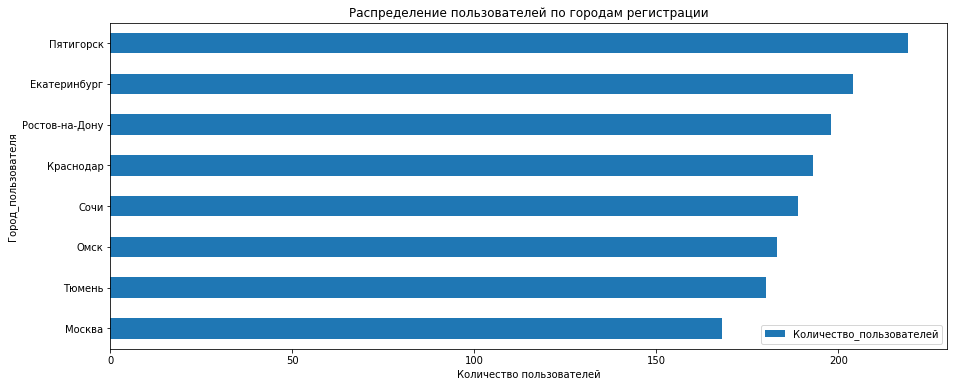

In [34]:
ax = city_reg_cnt[['Город_пользователя', 'Количество_пользователей']] \
        .sort_values(by='Количество_пользователей', ascending=True) \
        .plot(x='Город_пользователя', y='Количество_пользователей', kind='barh', figsize=(15,6))

ax.set_title('Распределение пользователей по городам регистрации')
ax.set_xlabel('Количество пользователей')


plt.show()

Мы видим, что
- всего мы имеем `8` городов, где работает сервис `GoFast`;
- количество пользователей сервиса в регионах больше чем в Москве;
- доли городов имеют значение от `0.11` до `0.14`.

### 3.2 Пользователи с подпиской и без подписки

Строим сводную таблицу по распределению пользователей по типу подписки

In [35]:
subscription_type_cnt = users_go \
            .pivot_table(index='subscription_type', values=['user_id'], aggfunc='count') \
            .reset_index() \
            .sort_values(by='user_id', ascending=False)
subscription_type_cnt.columns = ['Тип_подписки', 'Количество_пользователей']
subscription_type_cnt['Процент_пользователей'] = \
(100*subscription_type_cnt['Количество_пользователей']/subscription_type_cnt['Количество_пользователей'].sum()).round(2)
subscription_type_cnt

,Тип_подписки,Количество_пользователей,Процент_пользователей
0,free,835,54.43
1,ultra,699,45.57


Строим распределение пользователей по типам подписок

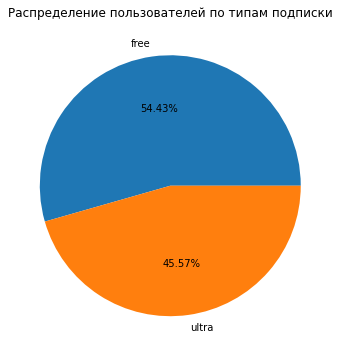

In [37]:
plt.figure(figsize=(10, 6))
plt.pie(subscription_type_cnt['Процент_пользователей'], labels = subscription_type_cnt['Тип_подписки'], autopct='%.2f%%')
plt.title('Распределение пользователей по типам подписки');

Мы видим, что подписка есть примерно у `45%` пользователей

### 3.3 Возраст пользователей

Строим сводную таблицу по распределению пользователей по возрасту

In [38]:
user_age_cnt = users_go \
            .pivot_table(index='age', values=['user_id'], aggfunc='count') \
            .reset_index()
user_age_cnt.columns = ['Возраст_пользователей', 'Количество_пользователей']
user_age_cnt

,Возраст_пользователей,Количество_пользователей
0,12,4
1,13,8
2,14,9
3,15,13
4,16,19
5,17,26
6,18,46
7,19,47
8,20,71
9,21,93


Строим гистограмму по распределению пользователей по возрасту

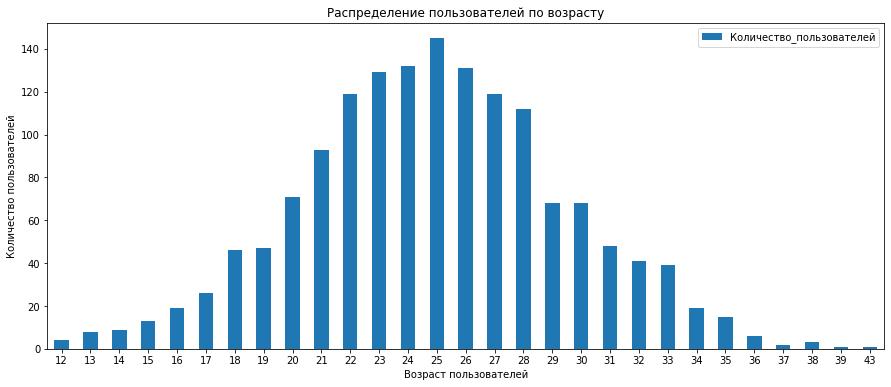

In [39]:
ax = user_age_cnt[['Возраст_пользователей', 'Количество_пользователей']] \
        .plot(x='Возраст_пользователей', y='Количество_пользователей', kind='bar', figsize=(15,6))

ax.set_title('Распределение пользователей по возрасту')
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Возраст пользователей')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Смотрим на статистические данные возрастов пользователей

In [40]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Распределение возрастов имеет форму нормального, поэтому можем воспользоваться следущими правилами для нормального распределения 

In [41]:
age_perc_68_2_low = round(users_go['age'].mean() - users_go['age'].std(),2)
age_perc_68_2_up = round(users_go['age'].mean() + users_go['age'].std(),2)
age_perc_99_8_low = round(users_go['age'].mean() - 3*users_go['age'].std(),2)
age_perc_99_8_up = round(users_go['age'].mean() + 3*users_go['age'].std(),2)

print(f'68.2% возрастов находятся в пределах от {age_perc_68_2_low} до {age_perc_68_2_up}')
print(f'99.8% возрастов находятся в пределах от {age_perc_99_8_low} до {age_perc_99_8_up}')

68.2% возрастов находятся в пределах от 20.33 до 29.48
99.8% возрастов находятся в пределах от 11.19 до 38.62


Мы видим, что
- распределение возрастов имеет вид нормального распределения;
- в среднем  возраст пользователей около `25` лет;
- около `70%` пользователей имеют возраст от `20` до `30` лет;
- почти `100%` пользователей имеют возраст от `12` до `39` лет

### 3.4 Расстояние поездки

Строим сводную таблицу по распределению расстояния, которое пользователь преодолел за одну поездку

In [42]:
dist_len_cnt = rides_go \
            .pivot_table(index=pd.cut(rides_go['distance'], 
                                      right=False, bins=10, precision=1), values=['user_id'], aggfunc='count') \
            .reset_index()
dist_len_cnt.columns = ['Расстояние_поездки_км', 'Количество_пользователей']
dist_len_cnt

,Расстояние_поездки_км,Количество_пользователей
0,"[0.9, 707.4)",938
1,"[707.4, 1413.9)",822
2,"[1413.9, 2120.4)",890
3,"[2120.4, 2826.9)",3856
4,"[2826.9, 3533.4)",5647
5,"[3533.4, 4239.9)",3542
6,"[4239.9, 4946.5)",1734
7,"[4946.5, 5653.0)",445
8,"[5653.0, 6359.5)",86
9,"[6359.5, 7073.1)",13


Строим гистограмму по распределению пользователей по расстоянию поездки

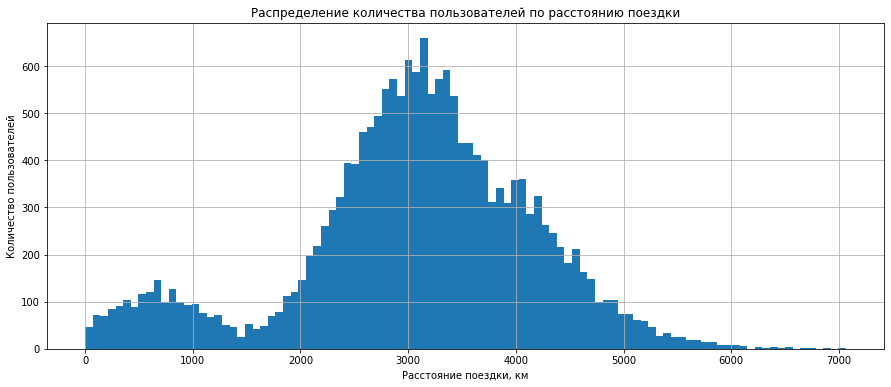

In [43]:
ax = rides_go['distance'].hist(bins=100, figsize=(15,6))

ax.set_title('Распределение количества пользователей по расстоянию поездки')
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Расстояние поездки, км')

plt.show()

Смотрим на статистические данные дальностей поездок

In [44]:
rides_go['distance'].describe()

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

Распределение возрастов имеет форму схожую с нормальным, поэтому можем воспользоваться следущими правилами для нормального распределения 

In [45]:
dist_perc_68_2_low = round(rides_go['distance'].mean() - rides_go['distance'].std(),2)
dist_perc_68_2_up = round(rides_go['distance'].mean() + rides_go['distance'].std(),2)
dist_perc_99_8_low = round(rides_go['distance'].mean() - 3*rides_go['distance'].std(),2)
dist_perc_99_8_up = round(rides_go['distance'].mean() + 3*rides_go['distance'].std(),2)

print(f'68.2% дальностей поездок находятся в пределах от {dist_perc_68_2_low} до {dist_perc_68_2_up}')
print(f'99.8% дальностей поездок находятся в пределах от {dist_perc_99_8_low} до {dist_perc_99_8_up}')

68.2% дальностей поездок находятся в пределах от 1951.05 до 4168.68
99.8% дальностей поездок находятся в пределах от -266.58 до 6386.31


Мы видим, что
- распределение дальностей поездок имеет вид схожий с нормальным распределением;
- в среднем  дальность поездок около `3.1` км;
- около `70%` дальностей поездок попадают в интервал от `2` до `4.1` км;
- почти `100%` дальностей поездок попадают в интервал от `86` метров до `6.4` км.

### 3.5 Продолжительность поездки

Строим сводную таблицу по распределению времени, которое пользователь потратил на одну поездку

In [46]:
dist_len_cnt = rides_go \
            .pivot_table(index=pd.cut(rides_go['duration'], \
                        right=False, bins=10, precision=1), values=['user_id'], aggfunc='count') \
            .reset_index()
dist_len_cnt.columns = ['Продолжительность_поездки_мин', 'Количество_пользователей']
dist_len_cnt

,Продолжительность_поездки_мин,Количество_пользователей
0,"[2.0, 5.9)",313
1,"[5.9, 9.8)",1128
2,"[9.8, 13.7)",3056
3,"[13.7, 17.6)",4312
4,"[17.6, 21.4)",4367
5,"[21.4, 25.3)",2759
6,"[25.3, 29.2)",1342
7,"[29.2, 33.1)",559
8,"[33.1, 36.9)",130
9,"[36.9, 40.9)",7


Строим гистограмму по распределению пользователей по возрасту

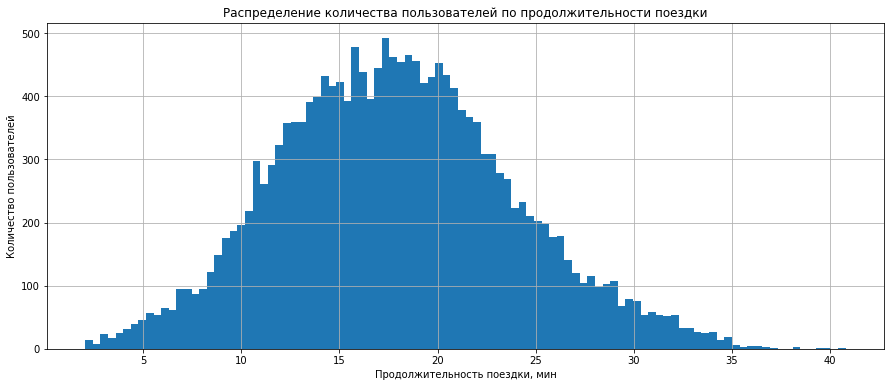

In [47]:
ax = rides_go['duration'].hist(bins=100, figsize=(15,6))

ax.set_title('Распределение количества пользователей по продолжительности поездки')
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Продолжительность поездки, мин')

plt.show()

Смотрим на статистические данные продолжительностей поездок

In [48]:
rides_go['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

Распределение продолжительностей поездок имеет форму схожую с нормальным, поэтому можем воспользоваться следущими правилами для нормального распределения 

In [49]:
dur_perc_68_2_low = round(rides_go['duration'].mean() - rides_go['duration'].std(),2)
dur_perc_68_2_up = round(rides_go['duration'].mean() + rides_go['duration'].std(),2)
dur_perc_99_8_low = round(rides_go['duration'].mean() - 3*rides_go['duration'].std(),2)
dur_perc_99_8_up = round(rides_go['duration'].mean() + 3*rides_go['duration'].std(),2)

print(f'68.2% продолжительностей поездок находятся в пределах от {dur_perc_68_2_low} до {dur_perc_68_2_up}')
print(f'99.8% продолжительностей поездок находятся в пределах от {dur_perc_99_8_low} до {dur_perc_99_8_up}')

68.2% продолжительностей поездок находятся в пределах от 11.92 до 23.87
99.8% продолжительностей поездок находятся в пределах от -0.03 до 35.82


Мы видим, что
- распределение продолжительностей поездок имеет вид схожий с нормальным распределением;
- в среднем  продолжительности поездок около `18` мин;
- около `70%` дальностей поездок попадают в интервал от `12` до `24` мин;
- почти `100%` дальностей поездок попадают в интервал от `2` до `36` мин.

## 4 Подготовка данных для дальнейшего анализа

Подготовим данные для сравнения пользователе с подпиской и без нее. Для этого объединим все данные в один dataframe и затем разделим данные на пользователей с подпиской и без нее.

### 4.1 Объединение данных

Соединим все данные в один dataframe для дальней работы

смотрим на размер соединяемых dataframe

In [50]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [51]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   year      17973 non-null  int64         
 5   month     17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 982.9 KB


In [52]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В итоге мы должны получить dataframe со всеми колонками и количеством строк равным 18068.

In [53]:
t = users_go.merge(rides_go, on ='user_id', how='left')

In [54]:
t.head()

,user_id,name,age,city,subscription_type,distance,duration,date,year,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021,8


In [55]:
df = t.merge(subscriptions_go, on ='subscription_type', how='left')

Проверяем какой dataframe мы получили

In [56]:
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021,8,6,0,199


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   year               17973 non-null  int64         
 9   month              17973 non-null  int64         
 10  minute_price       17973 non-null  int64         
 11  start_ride_price   17973 non-null  int64         
 12  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

Итак, все в порядке. Данные не потерялись и количество строк не увеличилось.

### 4.2 Разделение данных по типу  подписки

Создаем dataframe с поездками пользователей с подпиской

In [58]:
df_subscr_ultra = df[df['subscription_type']=='ultra'].copy()

Проверяем корректность

In [59]:
df_subscr_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   year               6500 non-null   int64         
 9   month              6500 non-null   int64         
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory us

In [60]:
df_subscr_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021,8,6,0,199


Создаем dataframe с поездками пользователей без подписки

In [61]:
df_subscr_free = df[df['subscription_type']=='free'].copy()

Проверяем корректность

In [62]:
df_subscr_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11473 entries, 6500 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11473 non-null  int64         
 1   name               11473 non-null  object        
 2   age                11473 non-null  int64         
 3   city               11473 non-null  object        
 4   subscription_type  11473 non-null  object        
 5   distance           11473 non-null  float64       
 6   duration           11473 non-null  float64       
 7   date               11473 non-null  datetime64[ns]
 8   year               11473 non-null  int64         
 9   month              11473 non-null  int64         
 10  minute_price       11473 non-null  int64         
 11  start_ride_price   11473 non-null  int64         
 12  subscription_fee   11473 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memo

In [63]:
df_subscr_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,year,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,2021,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2021,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2021,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2021,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2021,2,8,50,0


Итак, данные подготовлены корректно.

### 4.3 Сравнение длительности и дальности поездок с подпиской и без подписки

Строим сводную таблицу с группировкой по типу подписки

In [64]:
subscription_pivot_table = df \
.pivot_table(index='subscription_type', values=['distance', 'duration', 'user_id'], \
            aggfunc={'distance':['sum', 'mean', 'min', 'max'], 'duration':['sum', 'mean', 'min', 'max'], 'user_id':'count'})
subscription_pivot_table.columns=['dist_sum','dist_mean','dist_min','dist_max',
                                  'dur_sum','dur_mean','dur_min','dur_max',
                                  'num_rides']
subscription_pivot_table.round(1)

,dist_sum,dist_mean,dist_min,dist_max,dur_sum,dur_mean,dur_min,dur_max,num_rides
subscription_type,,,,,,,,,
free,7066.0,3028.4,0.9,34744537.6,34.9,17.5,2.0,201130.5,11473
ultra,5699.8,3115.4,244.2,20250395.0,40.8,18.5,3.8,120522.9,6500


#### 4.3.1 Расстояние поездок

Строим распределение `boxplot` распределения расстояния поездок по типам подписки

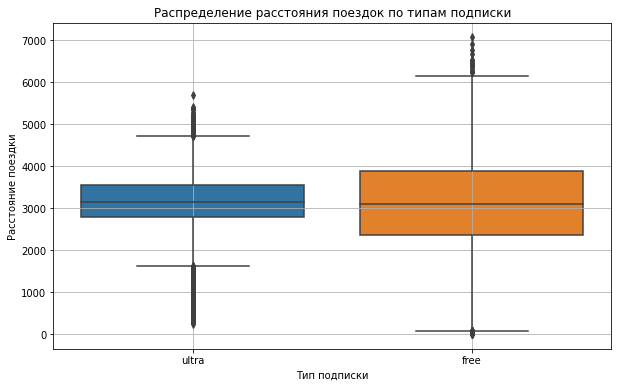

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='subscription_type', y='distance')

plt.title('Распределение расстояния поездок по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Расстояние поездки')
plt.grid(True)

plt.show()

Строим гистограмму распределения расстояния поездок по типам подписки

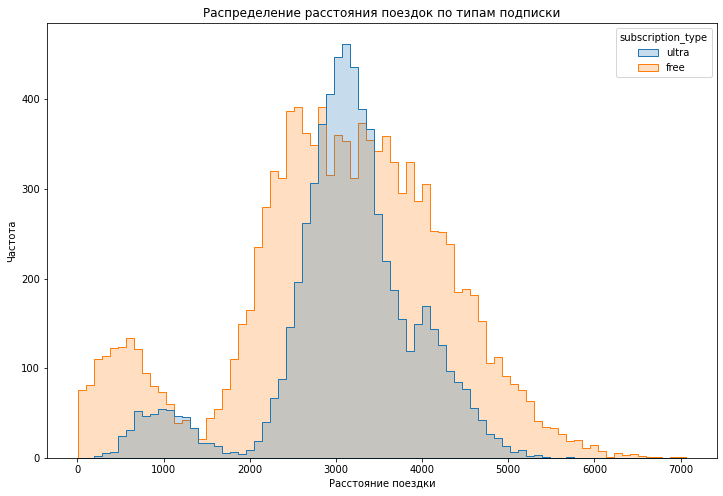

In [66]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='distance', hue='subscription_type', element='step')

plt.title('Распределение расстояния поездок по типам подписки')
plt.xlabel('Расстояние поездки')
plt.ylabel('Частота')

plt.show()

#### 4.3.2 Продолжительность поездок

Строим распределение `boxplot` распределения расстояния поездок по типам подписки

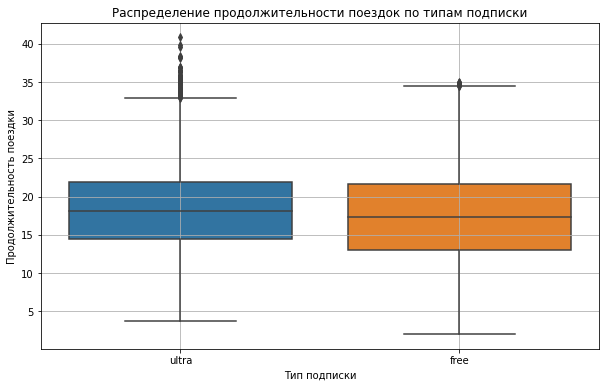

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='subscription_type', y='duration')

plt.title('Распределение продолжительности поездок по типам подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Продолжительность поездки')
plt.grid(True)

plt.show()

Строим гистограмму распределения длительности поездок по типам подписки

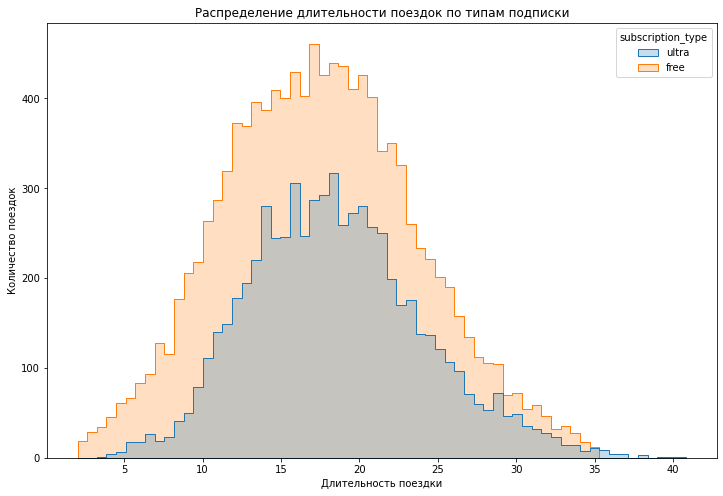

In [68]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='duration', hue='subscription_type', element='step')

plt.title('Распределение длительности поездок по типам подписки')
plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')

plt.show()

#### 4.3.3 Зависимость расстояния поездки от дительности

Строим распределение `scatter` зависимости расстояния поездки от ее длительности

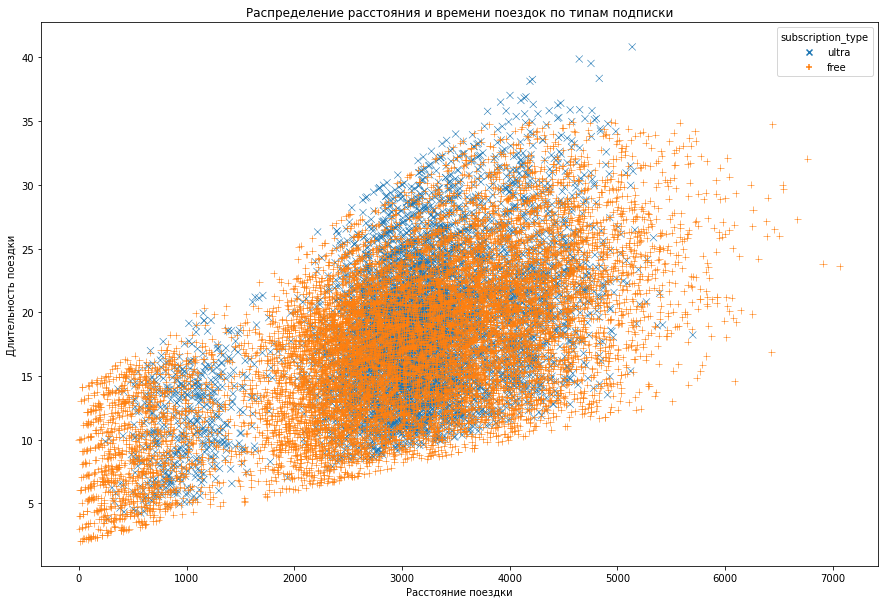

In [69]:
plt.figure(figsize=(15, 10))

sns.scatterplot(data=df, x='distance', y='duration', hue='subscription_type', style='subscription_type', \
                markers=['x', '+'], s=50)

plt.title('Распределение расстояния и времени поездок по типам подписки')
plt.xlabel('Расстояние поездки')
plt.ylabel('Длительность поездки')
plt.show()

Мы видим, что
- характеры распределений зависимости длительности поездки от дальности совпадают с подпиской и без подписки;
- среднее расстояние поездки немного больше у пользователей без подписки;
- среднее время поездки немного больше у пользователей с подпиской;
- количество коротких поездок больше у пользователей без подписки;
- количество поездок с подпиской `6500` почти в `2` раза ниже чем без подписки `11473`.

## 5 Подсчёт выручки

Строим сводную таблицу с группировкой по пользователю и месяцу поездки

In [70]:
df['duration'] = np.ceil(df['duration']) # округление длительности поездки до следующего целого числа
user_month_stat = df \
.pivot_table(index=['user_id', 'month', 'subscription_type', 'subscription_fee', 'start_ride_price', 'minute_price'], \
             values=['distance', 'duration', 'date'], \
            aggfunc={'distance':'sum', 'duration':'sum', 'date':'count'}) \
.reset_index()
user_month_stat.columns=['user_id', 'month', 'subscription_type', 'subscription_fee', 'start_ride_price', 'minute_price', 
                         'num_rides', 'dist_sum','dur_sum']
user_month_stat['revenue'] = user_month_stat['subscription_fee'] + \
                            user_month_stat['start_ride_price']*user_month_stat['num_rides'] + \
                            user_month_stat['minute_price']*user_month_stat['dur_sum']

user_month_stat.round(1)

,user_id,month,subscription_type,subscription_fee,start_ride_price,minute_price,num_rides,dist_sum,dur_sum,revenue
0,1,1,ultra,199,0,6,2,7027.5,42.0,451.0
1,1,4,ultra,199,0,6,1,754.2,7.0,241.0
2,1,8,ultra,199,0,6,2,6723.5,46.0,475.0
3,1,10,ultra,199,0,6,2,5809.9,32.0,391.0
4,1,11,ultra,199,0,6,3,7003.5,56.0,535.0
...,...,...,...,...,...,...,...,...,...,...
11295,1534,6,free,0,50,8,2,3409.5,26.0,308.0
11296,1534,8,free,0,50,8,2,7622.5,48.0,484.0
11297,1534,9,free,0,50,8,1,4928.2,23.0,234.0
11298,1534,11,free,0,50,8,4,13350.0,78.0,824.0


Рассчитаем изменение ежемесячной выручки пользователей с подпиской и без подписки

In [71]:
user_revenue_month = user_month_stat.pivot_table(index=['subscription_type', 'month'], \
                                                 values='revenue', aggfunc=['sum', 'mean', 'count']).reset_index()
user_revenue_month.columns = ['Тип_подписки', 'Месяц', 'Суммарная_выручка_млн_руб', 'Средняя_выручка_руб_мес', 
                              'Количество_пользователей']
user_revenue_month['Суммарная_выручка_млн_руб'] = user_revenue_month['Суммарная_выручка_млн_руб']/1000000
user_revenue_month.round(2)

,Тип_подписки,Месяц,Суммарная_выручка_млн_руб,Средняя_выручка_руб_мес,Количество_пользователей
0,free,1,0.19,324.38,596
1,free,2,0.17,315.63,524
2,free,3,0.19,338.61,551
3,free,4,0.19,335.49,552
4,free,5,0.19,327.91,572
5,free,6,0.19,326.84,587
6,free,7,0.18,329.11,561
7,free,8,0.19,331.53,563
8,free,9,0.19,335.68,576
9,free,10,0.18,331.86,546


Строим график изменения суммарной выручки по типам подписки

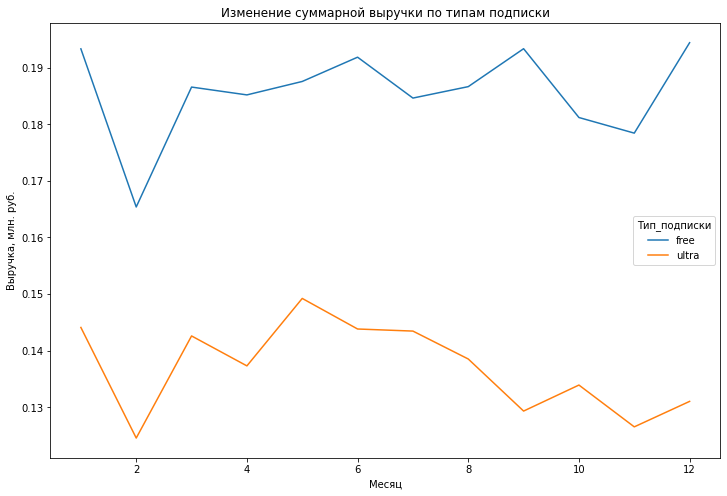

In [72]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=user_revenue_month, y='Суммарная_выручка_млн_руб', x='Месяц', hue='Тип_подписки')

plt.title('Изменение суммарной выручки по типам подписки')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн. руб.')

plt.show()

Строим график изменения средней выручки по типам подписки

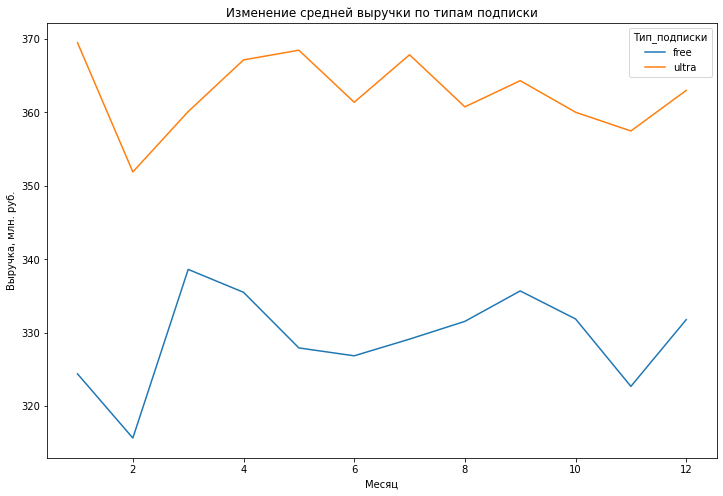

In [73]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=user_revenue_month, y='Средняя_выручка_руб_мес', x='Месяц', hue='Тип_подписки')

plt.title('Изменение средней выручки по типам подписки')
plt.xlabel('Месяц')
plt.ylabel('Выручка, млн. руб.')

plt.show()

Строим график изменения количества пользователей по типам подписки

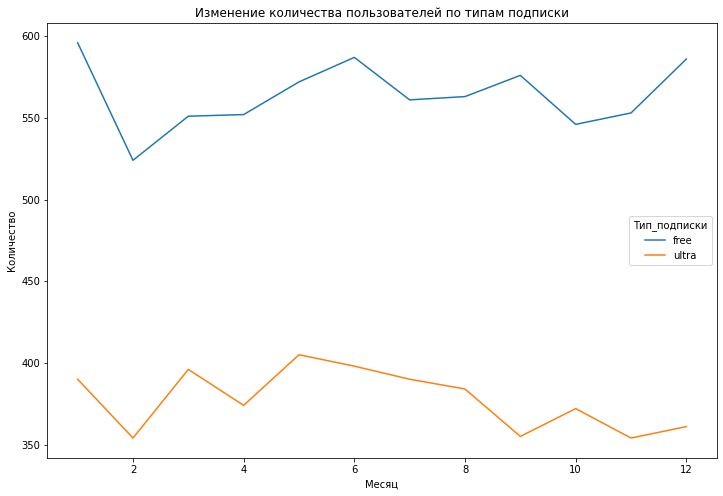

In [74]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=user_revenue_month, y='Количество_пользователей', x='Месяц', hue='Тип_подписки')

plt.title('Изменение количества пользователей по типам подписки')
plt.xlabel('Месяц')
plt.ylabel('Количество')

plt.show()

Рассчитаем данные о выручке пользователей с подпиской и без подписки

In [75]:
user_revenue = user_month_stat \
.pivot_table(index='subscription_type', values='revenue', aggfunc=['sum','mean','count']).reset_index()
user_revenue.columns = ['Тип_подписки', 'Суммарная_выручка_млн_руб', 'Средняя_выручка_руб_мес','Количество_пользователей']
user_revenue['Суммарная_выручка_млн_руб'] = user_revenue['Суммарная_выручка_млн_руб']/1000000
user_revenue.round(2)

,Тип_подписки,Суммарная_выручка_млн_руб,Средняя_выручка_руб_мес,Количество_пользователей
0,free,2.23,329.33,6767
1,ultra,1.64,362.79,4533


Итак, мы видим что:
- суммарная выручка за весь период больше у пользователей из-за большего количества пользователей;
- средняя выручка у пользователей с подпиской выше, чем у пользователей без подписки;
- у пользователей с подпиской наблюдается снижение суммарной выручки, количества пользователй при сохранении неизменной средней выручки.

## 6 Проверка гипотез

### 6.1 Тратят ли пользователи с подпиской больше времени на поездки

Необходимо проверить тратят ли пользователи с подпиской больше времени на поездки.  

У нас есть две независимые выборки: 
- первая содержит продолжительность поездок у пользователей с подпиской;
- вторая содержит продолжительность поездок у пользователей без подписки.  

Мы используем функцию ttest_ind() для выполнения t-теста независимых выборок и получения p-значения.

Формулируем гипотезы:
- H0: Нет различия в средней продолжительности поездок между группой  пользователей с подпиской и группой пользователей без подписки;  
- H1: Средняя продолжительность поездок в группе пользователей с подпиской статистически значимо выше, чем в группе без подписки.

In [76]:
# задаём уровень значимости
alpha = 0.05

# времена поездок группы пользователей (с подпиской)
ride_time_w_subscriprion = df_subscr_ultra['duration']
#среднее время поездок группы пользователей (с подпиской)
ride_time_w_subscriprion_mean = round(df_subscr_ultra['duration'].mean(),2)

# времена поездок группы пользователей (без подписки)
ride_time_wo_subscriprion = df_subscr_free['duration']
#среднее время поездок группы пользователей (без подписки)
ride_time_wo_subscriprion_mean = round(df_subscr_free['duration'].mean(),2)

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ride_time_w_subscriprion, ride_time_wo_subscriprion, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу."
          " Средняя продолжительность поездок в группе пользователей с подпиской статистически значимо выше, \n"
          "чем в группе без подписки.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу."
          " Нет статистически значимой разницы в средней продолжительности поездок между"
          " группой пользователей с подпиской и группой пользователей без подписки.")
print(f"Среднее время поездок пользователей с подпиской {ride_time_w_subscriprion_mean} мин.,"
      f" а без подписки {ride_time_wo_subscriprion_mean} мин.")

p-value: 4.704468074453899e-28
Отвергаем нулевую гипотезу. Средняя продолжительность поездок в группе пользователей с подпиской статистически значимо выше, 
чем в группе без подписки.
Среднее время поездок пользователей с подпиской 18.54 мин., а без подписки 17.53 мин.


Итак, средняя продолжительность поездок в группе пользователей с подпиской статистически значимо выше, чем в группе без подписки, в среднем `18.54` мин. против `17.53` мин. у пользователей без подписки.

### 6.2 Превышает ли расстояние поездки с подпиской 3130 м

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.  
Необходимо проверить превышает ли расстояние поездки с подпиской 3130 метров.  

У нас есть выборка пользователей с подпиской, которая содержит расстояния поездок. 

Мы используем функцию ttest_1samp() для выполнения t-теста односторонней гипотезы и получения p-значения.

Формулируем гипотезы:

- H0: Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает или равно 3130 метров 
- H1: Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров

In [77]:
# оптимальное расстояние поездки
ride_dist_opt = 3130
# расстояние поездки с подпиской
ride_dist_subscription =  round(df_subscr_ultra['distance'].mean(),2)

# уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(
    df_subscr_ultra['distance'], 
    ride_dist_opt,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу."
          " Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу."
          " Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает или равно 3130 метров.")
print(f'Среднее расстояние за поездку с подпиской {ride_dist_subscription} метров, а оптимальное {ride_dist_opt} метров.')

p-значение: 0.9195368847849785
Мы не можем отвергнуть нулевую гипотезу. Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает или равно 3130 метров.
Среднее расстояние за поездку с подпиской 3115.45 метров, а оптимальное 3130 метров.


Итак, расстояние, которое в среднем проезжают пользователи с подпиской за поездку, статистически значимо не превышает оптимальное расстояние `3130` метров.

### 6.3 Выручка у пользователей с подпиской превышает выручку пользователей без подписки

Необходимо проверить будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  

У нас есть две независимые выборки: 
- первая содержит продолжительность поездок у пользователей с подпиской;
- вторая содержит продолжительность поездок у пользователей без подписки.  

Мы используем функцию ttest_ind() для выполнения t-теста независимых выборок и получения p-значения.

Формулируем гипотезы:
- H0: Помесячная выручка от пользователей с подпиской не отличается или ниже, чем выручка от пользователей без подписки.  
- H1: Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [78]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
rev_w_subscr = user_month_stat.query('subscription_type=="ultra"')['revenue']
rev_w_subscr_mean = round(user_month_stat.query('subscription_type=="ultra"')['revenue'].mean(),2)

# траты второй группы пользователей (без подписки)
rev_wo_subscr = user_month_stat.query('subscription_type=="free"')['revenue']
rev_wo_subscr_mean = round(user_month_stat.query('subscription_type=="free"')['revenue'].mean(),2)

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ride_time_w_subscriprion, ride_time_wo_subscriprion, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Помесячная выручка от пользователей с подпиской выше,"
          " чем выручка от пользователей без подписки.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу."
          " Помесячная выручка от пользователей с подпиской не отличается или ниже, чем выручка от пользователей без подписки.")
print(f'Ежемесячная выручка пользователей с подпиской {rev_w_subscr_mean} руб., а без подписки {rev_wo_subscr_mean} руб.')

p-value: 4.704468074453899e-28
Отвергаем нулевую гипотезу. Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
Ежемесячная выручка пользователей с подпиской 362.79 руб., а без подписки 329.33 руб.


Итак, помесячная выручка от пользователей с подпиской не отличается или ниже, чем выручка от пользователей без подписки. Срдняя выручка пользователей с подпиской примерно на `33` рубля больше чем пользователей без подписки.

### 6.4 Выбор гипотезы для проверки после изменений

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобится для проверки этой гипотезы?

Здесь мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения. В этом случае мы будем проверять, равны ли средние генеральной совокупности до и после этого изменения.  
Гипотезы в таком случае будут сформулированы так:
- H0:μ1=μ2
- H1:μ1>μ2  

Выборки в этом случае будут зависимыми — парными. Это означает, что некоторая переменная измеряется дважды для одних и тех же объектов.  
Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок мы будем использовать парный t-тест, а в Python, будем использовать метод scipy.stats.ttest_rel().

## 7 Распределения

### 7.1 Увеличение количества платных подписок

Отделу маркетинга `GoFast` поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум `100` существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.   
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают `10%` пользователей.  

Задача:  
Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно `5%`.  
Подобрать параметры распределения, описывающего эту ситуацию и построить график распределения для вычисления необходимого минимальное количества промокодов, которые нужно отправить.  

Мы будем использовать биномиальное распределение, которое описывает количество успехов в серии независимых испытаний. В нашем случае, успехом является продление подписки, а неудачей - отказ от продления.  
Для биномиального распределения нам нужно знать два параметра: вероятность успеха `p` и количество испытаний `n`. В данном случае, вероятность успеха равна `0.1` (так как `10%` пользователей продлевают подписку), а количество испытаний - это количество клиентов, которые получат промокоды - `100` клиентов.  
Воспользуемся функцией `scipy.stats.binom.cdf()` для определения минимального количества промокодов, которые нужно разослать, чтобы вероятность не выполнить план была примерно `5%`. Для этого мы будем увеличивать количество испытаний `n` до тех пор, пока вероятность не выполнить план не станет меньше `5%`. 

Начнем с n = 100 (так как нам нужно, чтобы как минимум 100 клиентов продлили подписку). Для этого значения n мы можем вычислить вероятность того, что менее 100 клиентов продлят подписку, используя функцию 

In [79]:
n = 99
p = 0.1
k = 100
prob = 1
while prob > 0.05:
    k += 1
    prob = binom.cdf(n, k, p)
print(f"Мы получили вероятность равной {round(100*prob,2)}%, которая меньше 5%,"
      f" что что не менее `100` клиентов продлят подписку, если разослать количество промокодов равное {k}")

Мы получили вероятность равной 4.98%, которая меньше 5%, что что не менее `100` клиентов продлят подписку, если разослать количество промокодов равное 1161


Итак, для того чтобы не менее `100` клиентов продлили подписку с вероятностью не более `5%` не выполнить план нам нужно разослать не менее `1161` промокода.

Строим график распределение вероятности продления подписки

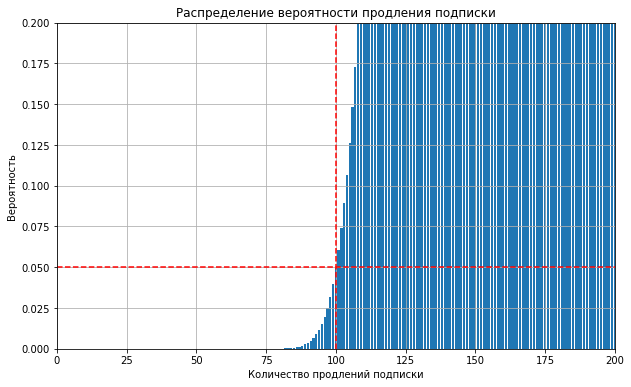

In [80]:
n = 1172 # количество попыток
p = 0.1 # вероятность успеха

distr = []

# Формируем распределение
for k in range(0, n + 1):
    current_value = binom.cdf(k, n, p)
    distr.append(current_value)

# Задаем размер графика
fig = plt.figure(figsize=(10, 6))
plt.bar(range(0, n + 1), distr)
plt.xlim(0, 200)
plt.ylim(0, 0.2)
plt.xlabel('Количество продлений подписки')
plt.ylabel('Вероятность')
plt.title('Распределение вероятности продления подписки')
plt.grid(True)
# Добавление вертикальной и горизонтальной линий
plt.axhline(y=0.05, color='r', linestyle='--')
plt.axvline(x=100, color='r', linestyle='--')

plt.show()

Итак, для того чтобы увеличить количество подписок на `100` с вероятностю не выполнить план примерно `5%` необходимо разослать `1172` промокода.

### 7.2 Поиск вероятности прочтения уведомления

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать.  
Известно, что уведомления открывают около 40 % получивших клиентов.  
Отдел планирует разослать 1 млн уведомлений.  

Задача:  
С помощью аппроксимации построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [81]:
# задаем параметры биномиального распределения
n = 1000000
p = 0.4

# рассчитываем параметры нормального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = distr = st.norm(mu, sigma) # задаем нормальное распределение

result = distr.cdf(399500)# вероятность открытия уведомления менее чем 399500 клиентами
print(f'Вероятность открытия уведомления менее чем 399500 клиентами равна {result}')


Вероятность открытия уведомления менее чем 399500 клиентами равна 0.15371708296369768


Строим график

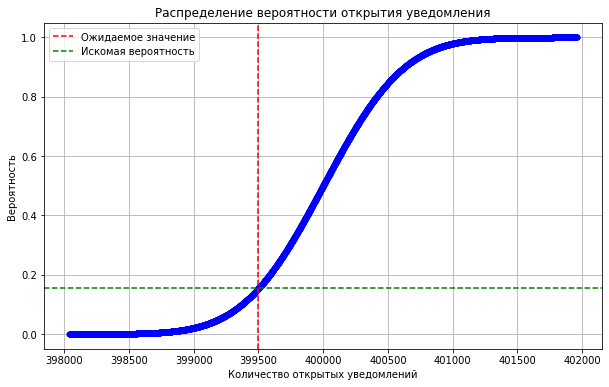

In [82]:
def linspace(start, stop, num): 
    step = (stop - start) / (num - 1) 
    result = [] 
    for i in range(num): 
        result.append(start + step * i) 
    return result 
  
n = 1000000 
k = 399500
p = 0.4 

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p))) 
right = int(n * p + 4 * sqrt(n * p * (1 - p))) 

# Задаем размер графика
fig = plt.figure(figsize=(10, 6))

# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right)) 
ax = plt.subplot() 

# Рисуем график биномиального распределения
ax.plot(x, binom.cdf(x, n, p), 'bo', ms=5)
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Вероятность')
plt.title('Распределение вероятности открытия уведомления')
plt.grid(True)

# Добавление вертикальной и горизонтальной линий
plt.axvline(x=k, color='r', linestyle='--', label='Ожидаемое значение')
plt.axhline(y=0.15371708296369768, color='g', linestyle='--', label='Искомая вероятность')

# Добавление легенды
plt.legend()

plt.show()

Итак, вероятность того, что уведомление откроют менее `399500` клиентов, при отправки `1000000` уведомлений, примерно равна `15.37%`.

## 8 Вывод

У нас были данные о некоторых пользователях сервиса аренды самокатов `GoFast` из нескольких городов, а также об их поездках.  
Известно:  
Чтобы совершать поездки по городу, пользователи сервиса `GoFast` пользуются мобильным приложением. 
Сервисом можно пользоваться:
- без подписки 
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — `8 рублей`;
    - стоимость старта (начала поездки) — `50 рублей`;
- с подпиской `Ultra` 
    - абонентская плата — `199 рублей` в месяц;
    - стоимость одной минуты поездки — `6 рублей`;
    - стоимость старта — `бесплатно`.
    
Исходные данные находятся в файлах:
- /datasets/users_go.csv (данные о пользователях)
- /datasets/rides_go.csv (данные о поездках)
- /datasets/subscriptions_go.csv (данные о подписках)

Необходимо было исследовать:
- частоту встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

Необходимо было проверить гипотезы:
- тратят ли пользователи с подпиской больше времени на поездки;
- можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает `3130` метров;
- будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;

Необходимо выяснить какой тест понадобился бы для проверки гипотезы о снижении обращаемости после проведения обновления сервиса.

С помощью распределений нужно было выяснить:
- рассчитать сколько отправить промокодов для увеличения платных подписок на `100` с вероятностью совершения ошибки менее `5%`;
- рассчитать вероятность прочтения уведомления менее чем `399500` клиентами.

Мы выполнили предобработку.

Мы получили следующие результаты исследования:
- всего мы имеем `8` городов, где работает сервис `GoFast`;
- количество пользователей сервиса в регионах больше чем в Москве;
- доли городов имеют значение от `0.11` до `0.14`;
- подписка есть у `45%` пользователей;
- распределение возрастов имеет вид нормального распределения;
- в среднем  возраст пользователей около `25` лет;
- около `70%` пользователей имеют возраст от `20` до `30` лет;
- почти `100%` пользователей имеют возраст от `12` до `39` лет;
- распределение дальностей поездок имеет вид схожий с нормальным распределением;
- в среднем  дальность поездок около `3.1` км;
- около `70%` дальностей поездок попадают в интервал от `2` до `4.1` км;
- почти `100%` дальностей поездок попадают в интервал от `86` метров до `6.4` км;
- распределение продолжительностей поездок имеет вид схожий с нормальным распределением;
- в среднем  продолжительности поездок около `18` мин;
- около `70%` дальностей поездок попадают в интервал от `12` до `24` мин;
- почти `100%` дальностей поездок попадают в интервал от `2` до `36` мин;
- характеры распределений зависимости длительности поездки от дальности совпадают с подпиской и без подписки;
- среднее расстояние поездки немного больше у пользователей без подписки;
- среднее время поездки немного больше у пользователей с подпиской;
- количество коротких поездок больше у пользователей без подписки;
- количество поездок с подпиской `6500` почти в `2` раза ниже чем без подписки `11473`;
- суммарная выручка за весь период больше у пользователей из-за большего количества пользователей;
- средняя выручка у пользователей с подпиской выше, чем у пользователей без подписки;
- у пользователей с подпиской наблюдается снижение суммарной выручки, количества пользователй при сохранении неизменной средней выручки.

Проверили гипотезы и выяснили что:
- средняя продолжительность поездок в группе пользователей с подпиской статистически значимо выше, чем в группе без подписки, в среднем `18.54` мин. против `17.53` мин. у пользователей без подписки;
- расстояние, которое в среднем проезжают пользователи с подпиской за поездку, статистически значимо не превышает оптимальное расстояние `3130` метров;
- помесячная выручка от пользователей с подпиской не отличается или ниже, чем выручка от пользователей без подписки. Срдняя выручка пользователей с подпиской примерно на `33` рубля больше чем пользователей без подписки.

Выяснили, что для проверки гипотезы о снижении обращаемости после проведения обновления сервиса мы будем использовать парный `t-тест`.

С помощью распределений вычислили что:
- для того чтобы не менее `100` клиентов продлили подписку с вероятностью не более `5%` не выполнить план нам нужно разослать не менее `1161` промокода;
- вероятность того, что уведомление откроют менее `399500` клиентов, при отправки `1000000` уведомлений, примерно равна `15.37%`.  

В итоге мы можем утвержать, что пользователи с подпиской более выгодны для сервиса аренды самокатов `GoFast`.